In [1]:
%matplotlib inline


# Filter Out Background Noise


Use PySoundTool to filter out background noise from audio signals. 

To see how PySoundTool implements this, see `pysoundtool.builtin.filtersignal`.



In [2]:
# to be able to import pysoundtool from parent directory:
import os
package_dir = '../'
os.chdir(package_dir)

Let's import pysoundtool, assuming it is in your working directory:



In [3]:
import pysoundtool_online as pyst;
import IPython.display as ipd

/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/airos/Projects/github/a-n-rose/Python-Sound-Tool/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of typ

### PySoundTool offers an example audio file. Let's use it and add some white background noise.



Speech sample:



In [4]:
# Use function 'string2pathlib' to turn string path into pathlib object 
# This allows flexibility across operating systems
speech = pyst.string2pathlib('audiodata/python.wav')

## Hear and see the speech 

In [5]:
# set feature_type for visualization: 'stft' (same as 'powspec'), 'fbank', 'mfcc'
feature_type = 'stft'
# For filtering, we will set the sample rate to be quite high:
sr = 48000
s, sr = pyst.loadsound(speech, sr=sr)
ipd.Audio(s,rate=sr)

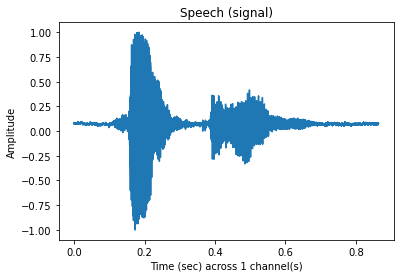

In [6]:
pyst.plotsound(s, sr=sr, feature_type='signal', title='Speech (signal)')

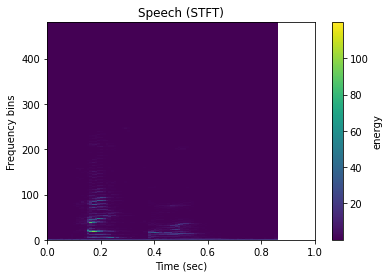

In [7]:
pyst.plotsound(s, sr=sr, feature_type=feature_type, title='Speech ({})'.format(feature_type.upper()))

## Add noise: 10 SNR 

Go ahead and play with different SNR levels and see how the filtering handles it.

In [8]:
snr = 10

In [9]:
s_snr = pyst.augment.add_white_noise(s, sr=sr, snr=snr)

In [10]:
ipd.Audio(s_snr,rate=sr)

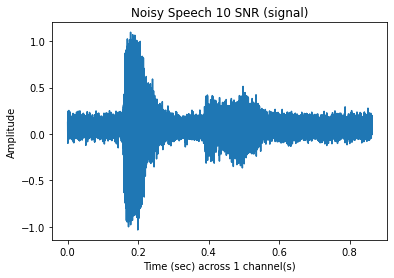

In [11]:
pyst.plotsound(s_snr, sr=sr, feature_type='signal', title='Noisy Speech {} SNR (signal)'.format(snr))

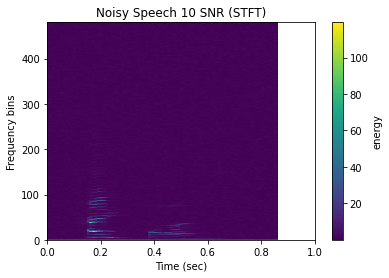

In [12]:
pyst.plotsound(s_snr, sr=sr, feature_type=feature_type, title='Noisy Speech {} SNR ({})'.format(snr, feature_type.upper()))

## Wiener Filter 

In [13]:
wf_snr, sr = pyst.filtersignal(s_snr,
                               sr=sr,
                               filter_type='wiener', # default filter
                               filter_scale=5, # default = 1
                               duration_noise_ms = 120, # amount of time at beg of signal for noise reference
                               )

volume adjusted from 1.07 to 0.4


In [14]:
ipd.Audio(wf_snr,rate=sr)

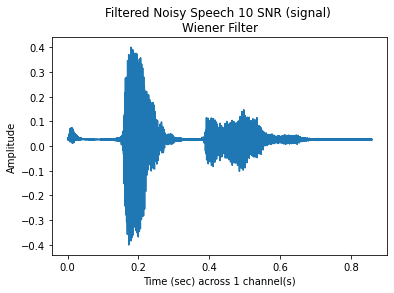

In [15]:
pyst.plotsound(wf_snr, sr=sr, feature_type='signal', 
               title='Filtered Noisy Speech {} SNR (signal) \nWiener Filter'.format(snr))

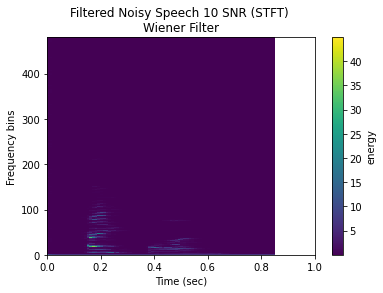

In [16]:
pyst.plotsound(wf_snr, sr=sr, feature_type=feature_type, 
               title='Filtered Noisy Speech {} SNR ({}) \nWiener Filter'.format(snr, feature_type.upper()))

## Wiener Filter with Postfilter

In this case, **the post filter doesn't improve the signal** (rather makes it worse). But if you have a filtered signal that has a lot of 'musical noise' or artifacts resulting from filtering, this postfilter should reduce those artifacts. 

In [17]:
wf_snr_pf, sr = pyst.filtersignal(s_snr,
                                   sr=sr,
                                   filter_type='wiener',
                                   filter_scale=5,
                                   duration_noise_ms = 120,
                                   apply_postfilter = True)

volume adjusted from 0.77 to 0.4


In [18]:
ipd.Audio(wf_snr_pf,rate=sr)

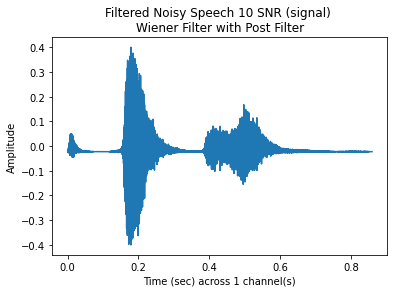

In [19]:
pyst.plotsound(wf_snr_pf, sr=sr, feature_type='signal', 
               title='Filtered Noisy Speech {} SNR (signal) \nWiener Filter with Post Filter'.format(snr))

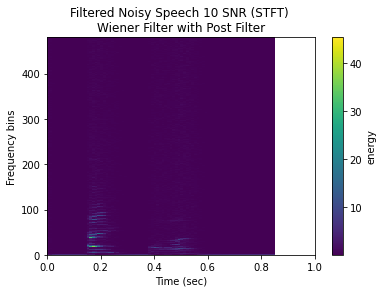

In [20]:
pyst.plotsound(wf_snr_pf, sr=sr, feature_type=feature_type, 
               title='Filtered Noisy Speech {} SNR ({}) \nWiener Filter with Post Filter'.format(snr, feature_type.upper()))